In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados da planilha Excel, estruturados como um dicionário
dados = {
    "8mm": {
        "4": {
            "H (mm)": [2.52, 2.83, 2.75, 2.87, 2.94],
            "Q (mm/s)": [0.2, 0.21, 0.21, 0.21, 0.21]
        },
        "8": {
            "H (mm)": [8.21, 8.72, 8.48, 8.98, 9.03],
            "Q (mm/s)": [0.36, 0.36, 0.36, 0.37, 0.37]
        },
        "11": {
            "H (mm)": [15.08, 14.09, 15.01, 15.51, 15.64],
            "Q (mm/s)": [0.48, 0.46, 0.48, 0.48, 0.49]
        }
    },
    "15mm": {
        "4": {
            "H (mm)": [2.59, 2.74, 2.74, 2.72, 2.59],
            "Q (mm/s)": [0.2, 0.21, 0.21, 0.2, 0.2]
        },
        "8": {
            "H (mm)": [7.24, 7.35, 7.31, 7.38, 7.03],
            "Q (mm/s)": [0.34, 0.33, 0.33, 0.33, 0.33]
        },
        "11": {
            "H (mm)": [11.98, 12.25, 11.55, 11.62, 11.68],
            "Q (mm/s)": [0.43, 0.43, 0.42, 0.42, 0.42]
        }
    },
    "22mm": {
        "4": {
            "H (mm)": [1.85, 1.85, 1.85, 1.85, 1.85],
            "Q (mm/s)": [0.16, 0.17, 0.17, 0.17, 0.17]
        },
        "8": {
            "H (mm)": [5.37, 5.51, 5.37, 5.37, 5.55],
            "Q (mm/s)": [0.28, 0.29, 0.28, 0.29, 0.29]
        },
        "11": {
            "H (mm)": [8.88, 8.89, 9.01, 9.03, 8.74],
            "Q (mm/s)": [0.36, 0.37, 0.37, 0.37, 0.36]
        }
    }
}


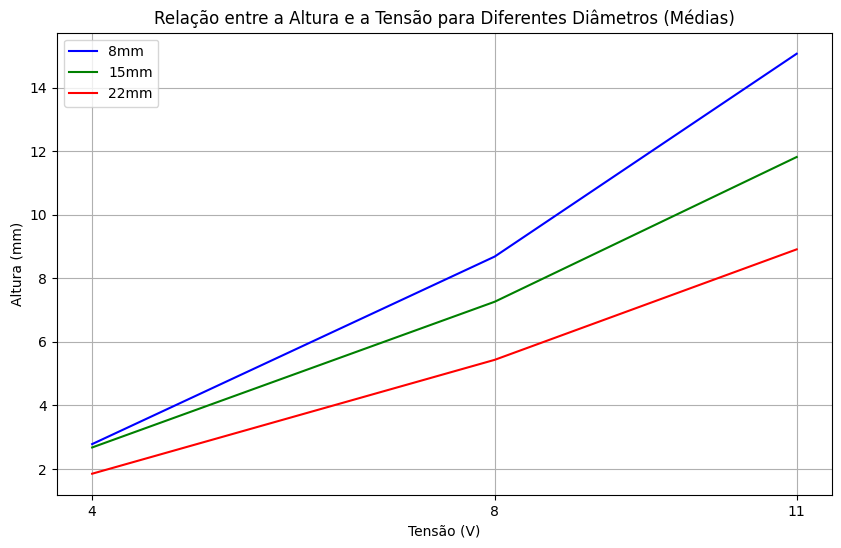

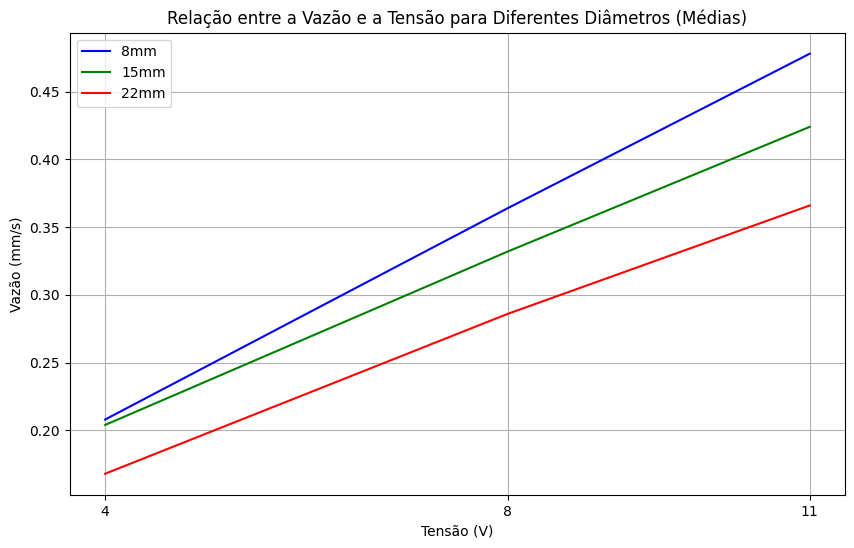

In [29]:
# Cria um DataFrame a partir dos dados
df = pd.DataFrame()

for diametro, dados_diametro in dados.items():
    for tensao, valores in dados_diametro.items():
        df_temp = pd.DataFrame(valores)
        df_temp["Diâmetro"] = diametro
        # Converte "Tensão" para numérica
        df_temp["Tensão"] = int(tensao.replace("V", ""))
        df = pd.concat([df, df_temp], ignore_index=True)

# Define as cores para cada diâmetro
cores = {"8mm": "blue", "15mm": "green", "22mm": "red"}

# Cria o gráfico H x V com linhas ligando as médias
plt.figure(figsize=(10, 6))
for diametro in df["Diâmetro"].unique():
    df_diametro = df[df["Diâmetro"] == diametro]
    medias_h = df_diametro.groupby("Tensão")["H (mm)"].mean()
    plt.plot(medias_h.index, medias_h.values, color=cores[diametro], label=diametro)

plt.xlabel("Tensão (V)")
plt.ylabel("Altura (mm)")
plt.title("Relação entre a Altura e a Tensão para Diferentes Diâmetros (Médias)")
plt.xticks([4, 8, 11])  # Define os ticks do eixo X
plt.legend()
plt.grid(True)
plt.show()

# Cria o gráfico Q x V com linhas ligando as médias
plt.figure(figsize=(10, 6))
for diametro in df["Diâmetro"].unique():
    df_diametro = df[df["Diâmetro"] == diametro]
    medias_q = df_diametro.groupby("Tensão")["Q (mm/s)"].mean()
    plt.plot(medias_q.index, medias_q.values, color=cores[diametro], label=diametro)

plt.xlabel("Tensão (V)")
plt.ylabel("Vazão (mm/s)")
plt.title("Relação entre a Vazão e a Tensão para Diferentes Diâmetros (Médias)")
plt.xticks([4, 8, 11])  # Define os ticks do eixo X
plt.legend()
plt.grid(True)
plt.show()

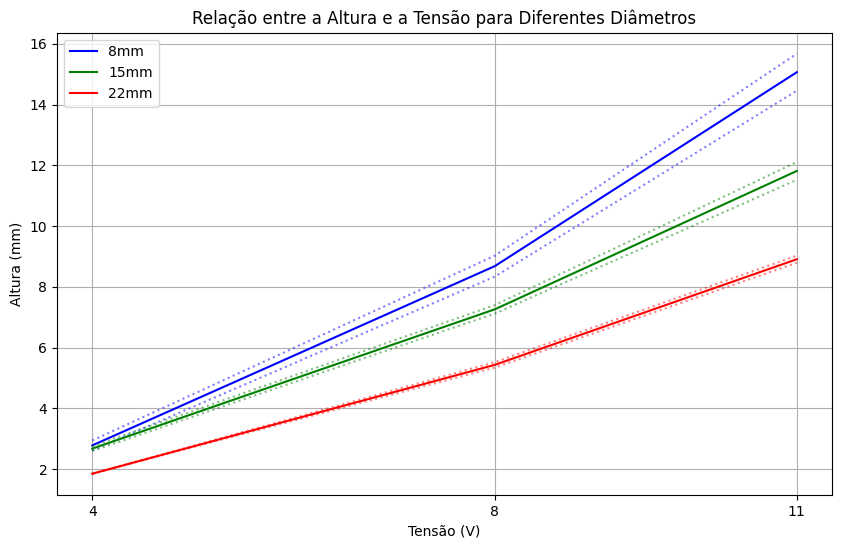

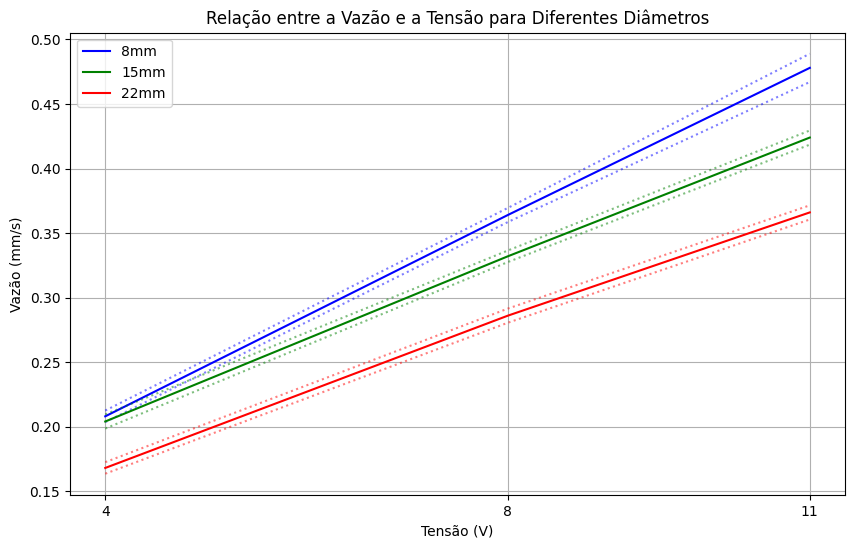

In [33]:
# Cria o gráfico H x V com linhas ligando as médias e barras de erro
plt.figure(figsize=(10, 6))
for diametro in df["Diâmetro"].unique():
    df_diametro = df[df["Diâmetro"] == diametro]
    medias_h = df_diametro.groupby("Tensão")["H (mm)"].mean()
    desvios_h = df_diametro.groupby("Tensão")["H (mm)"].std()

    # Cálculo de máximos e mínimos de incerteza
    maximos_h = medias_h + desvios_h
    minimos_h = medias_h - desvios_h

    # Plota as linhas contínuas para as médias
    plt.plot(medias_h.index, medias_h.values, "-", color=cores[diametro], label=diametro)

    # Plota as linhas pontilhadas para máximos e mínimos
    plt.plot(maximos_h.index, maximos_h.values, ":", color=cores[diametro], alpha=0.5)
    plt.plot(minimos_h.index, minimos_h.values, ":", color=cores[diametro], alpha=0.5)

plt.xlabel("Tensão (V)")
plt.ylabel("Altura (mm)")
plt.title("Relação entre a Altura e a Tensão para Diferentes Diâmetros")
plt.xticks([4, 8, 11])
plt.legend()
plt.grid(True)
plt.show()

# Cria o gráfico Q x V com linhas ligando as médias e barras de erro
plt.figure(figsize=(10, 6))
for diametro in df["Diâmetro"].unique():
    df_diametro = df[df["Diâmetro"] == diametro]
    medias_q = df_diametro.groupby("Tensão")["Q (mm/s)"].mean()
    desvios_q = df_diametro.groupby("Tensão")["Q (mm/s)"].std()

    # Cálculo de máximos e mínimos de incerteza
    maximos_q = medias_q + desvios_q
    minimos_q = medias_q - desvios_q

    # Plota as linhas contínuas para as médias
    plt.plot(medias_q.index, medias_q.values, "-", color=cores[diametro], label=diametro)

    # Plota as linhas pontilhadas para máximos e mínimos
    plt.plot(maximos_q.index, maximos_q.values, ":", color=cores[diametro], alpha=0.5)
    plt.plot(minimos_q.index, minimos_q.values, ":", color=cores[diametro], alpha=0.5)

plt.xlabel("Tensão (V)")
plt.ylabel("Vazão (mm/s)")
plt.title("Relação entre a Vazão e a Tensão para Diferentes Diâmetros")
plt.xticks([4, 8, 11])
plt.legend()
plt.grid(True)
plt.show()

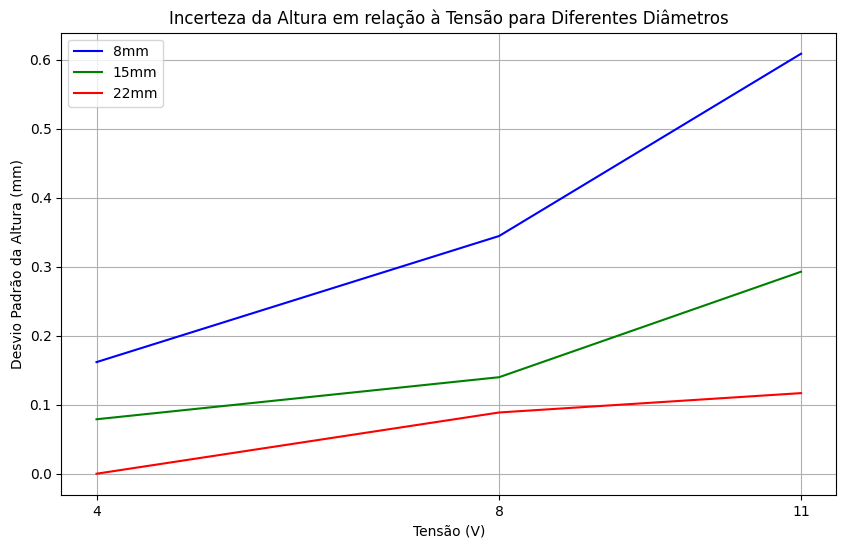

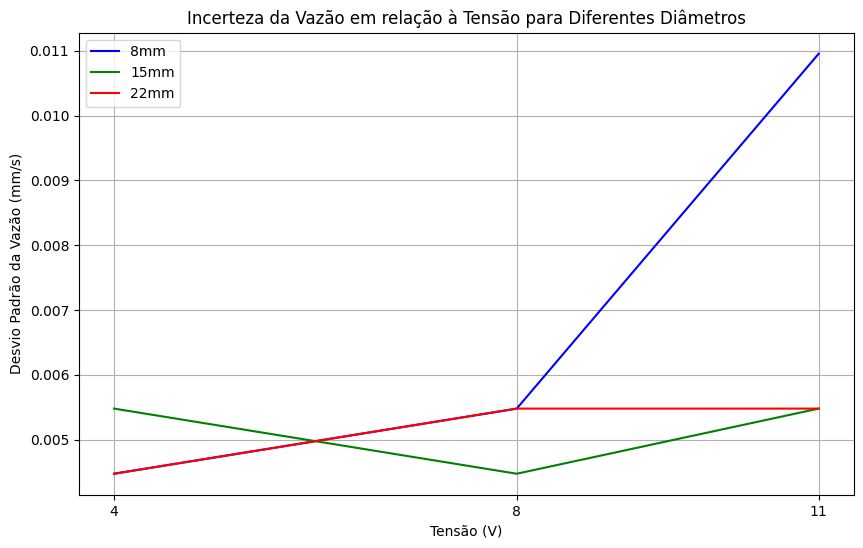

In [31]:
# Cria o gráfico da incerteza vs tensão para H (mm)
plt.figure(figsize=(10, 6))
for diametro in df["Diâmetro"].unique():
    df_diametro = df[df["Diâmetro"] == diametro]
    desvios_h = df_diametro.groupby("Tensão")["H (mm)"].std()
    plt.plot(desvios_h.index, desvios_h.values, "-", color=cores[diametro], label=diametro)

plt.xlabel("Tensão (V)")
plt.ylabel("Desvio Padrão da Altura (mm)")
plt.title("Incerteza da Altura em relação à Tensão para Diferentes Diâmetros")
plt.xticks([4, 8, 11])
plt.legend()
plt.grid(True)
plt.show()

# Cria o gráfico da incerteza vs tensão para Q (mm/s)
plt.figure(figsize=(10, 6))
for diametro in df["Diâmetro"].unique():
    df_diametro = df[df["Diâmetro"] == diametro]
    desvios_q = df_diametro.groupby("Tensão")["Q (mm/s)"].std()
    plt.plot(desvios_q.index, desvios_q.values, "-", color=cores[diametro], label=diametro)

plt.xlabel("Tensão (V)")
plt.ylabel("Desvio Padrão da Vazão (mm/s)")
plt.title("Incerteza da Vazão em relação à Tensão para Diferentes Diâmetros")
plt.xticks([4, 8, 11])
plt.legend()
plt.grid(True)
plt.show()